# KMeans Clustering Visualizations - Breast Cancer Data

### Objective: 

To demonstrate the Kmeans Model fitting and visualization of the obtained clusters along with the scores.

In [1]:
# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading & Analysis

In [3]:
# import data
from sklearn.datasets import load_breast_cancer

bc =  load_breast_cancer()

X = pd.DataFrame(bc.data, columns = bc.feature_names)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Target column
Y = bc.target
set(Y)

{0, 1}

In [5]:
# checking for datatypes
X.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

##### All features are of data type Float

In [6]:
# missing values
X.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

##### No missing values in the dataset

## Scaling the Data

- done to normalise the data into a certain range for all the feature data

In [7]:
from sklearn.preprocessing import MinMaxScaler

mx = MinMaxScaler()
X1 = mx.fit_transform(X)
# type(X1)

X1 = pd.DataFrame(X1, columns = X.columns)
X1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


##### Scaled the data to a common range

### Dimensionality Reduction

In [8]:
from sklearn.decomposition import PCA
pca = PCA(2)

df = pca.fit_transform(X)
df

array([[1160.1425737 , -293.91754364],
       [1269.12244319,   15.63018184],
       [ 995.79388896,   39.15674324],
       ...,
       [ 314.50175618,   47.55352518],
       [1124.85811531,   34.12922497],
       [-771.52762188,  -88.64310636]])

##### INFERENCE: The entire data has been converted into a two feature data using PCA dimensionality reduction

## Model Fitting

In [9]:
# K Means Clustering

from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state=1)

labels = km.fit_predict(df)

  File "C:\Users\dijdo\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


## Model Evaluation - Identifying Optimum k Value

### 1. Elbow Method

In [10]:
wcss = []

for i in range(1,11):
    km1 = KMeans(n_clusters=i, random_state=1)
    km1.fit(df)
    wcss.append(km1.inertia_)
    
wcss

[256220656.5582857,
 77487123.40340449,
 47062222.00125871,
 29191363.604436513,
 20269546.867149025,
 16295613.254842656,
 12915039.919087462,
 12104434.574120913,
 9273256.389487324,
 8219143.566236881]

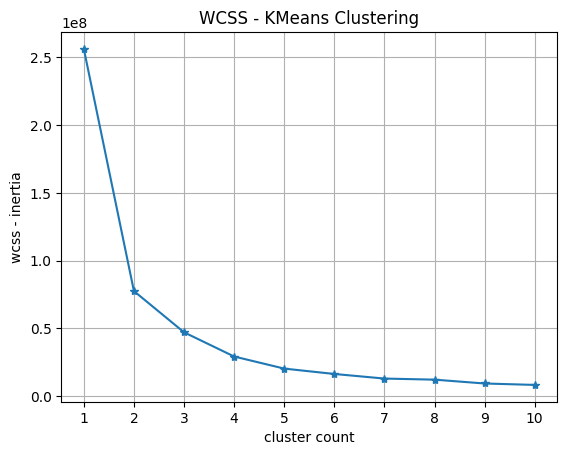

In [11]:
clusters = list(range(1, 11))

plt.plot(clusters, wcss, marker='*')
plt.xlabel("cluster count")
plt.ylabel("wcss - inertia")
plt.grid(True)
plt.xticks(list(range(1,11)))
plt.title("WCSS - KMeans Clustering")
plt.show()

##### INFERENCE: we observe the elbow formation at cluster count 2, however, it is difficult to conclude the ideal cluster number from the elbow method as it considers only WCSS. So we find its silhoutte scores

### 2. Silhoutte Score

In [12]:
from sklearn.metrics import silhouette_score, silhouette_samples

silhouette_score(df, km.labels_) # km has model trained with 2 clusters

0.6984195775999955

In [13]:
ss = [0]

for i in range(2,11):
    km2 = KMeans(n_clusters=i, random_state=1)
    km2.fit(df)
    ss.append(silhouette_score(df, km2.labels_))

ss

[0,
 0.6984195775999955,
 0.6483033400819994,
 0.5466573646903753,
 0.5112344811024189,
 0.5001817913177246,
 0.4860318846452636,
 0.478952074804149,
 0.4663031442622742,
 0.45398172148417487]

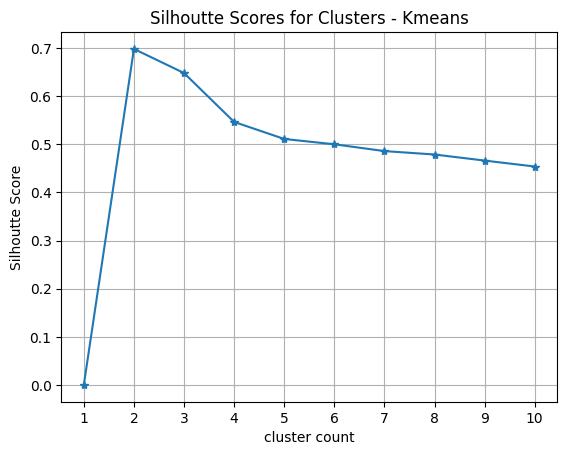

In [14]:
plt.plot(clusters, ss, marker='*')
plt.xlabel("cluster count")
plt.ylabel("Silhoutte Score")
plt.grid(True)
plt.xticks(list(range(1,11)))
plt.title("Silhoutte Scores for Clusters - Kmeans")
plt.show()

##### INFERENCE: Higher silhoutte scores indicate the data is well clustered. We observe the highest cluster score at cluster count 2, hence the optimum k value is concluded to be 2.

## Visualizing the Cluster

In [15]:
#Getting the Centroids
centroids = km.cluster_centers_

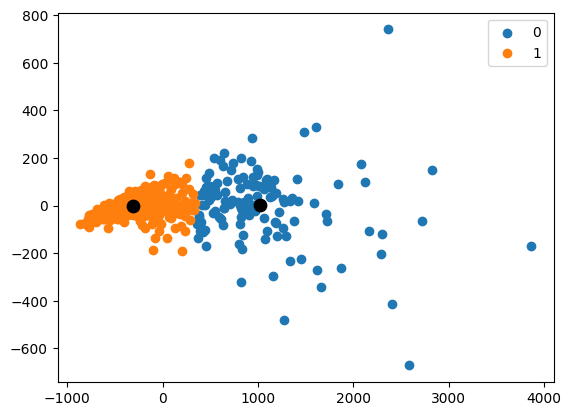

In [16]:
u_labels = np.unique(labels)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[labels == i , 0] , df[labels == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

## Visual Evaluation - Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix

actual = bc.target
cm = confusion_matrix(actual, labels)
cm

array([[130,  82],
       [  1, 356]], dtype=int64)

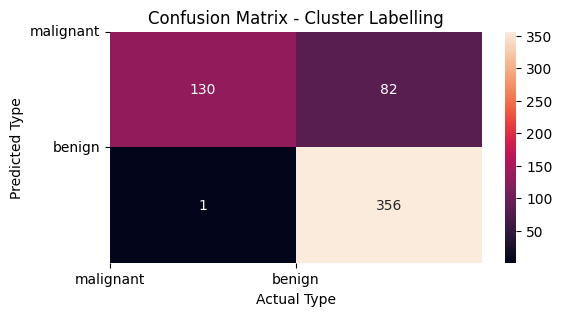

In [19]:
plt.figure(figsize = (6,3))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xticks(ticks =np.arange(len(bc.target_names)), labels = bc.target_names, rotation = 0)
plt.yticks(ticks =np.arange(len(bc.target_names)), labels = bc.target_names, rotation = 0)
plt.title("Confusion Matrix - Cluster Labelling")
plt.xlabel("Actual Type")
plt.ylabel("Predicted Type")
plt.show()

##### In the matrix we observe, most of the predictions made are accurate, showing the cluster predictions are marked correctly.

For n_clusters = 2 The average silhouette_score is : 0.6972646156059464
For n_clusters = 3 The average silhouette_score is : 0.5471360437420352
For n_clusters = 4 The average silhouette_score is : 0.5334614737117133
For n_clusters = 5 The average silhouette_score is : 0.5071395181003269
For n_clusters = 6 The average silhouette_score is : 0.4680910789309596


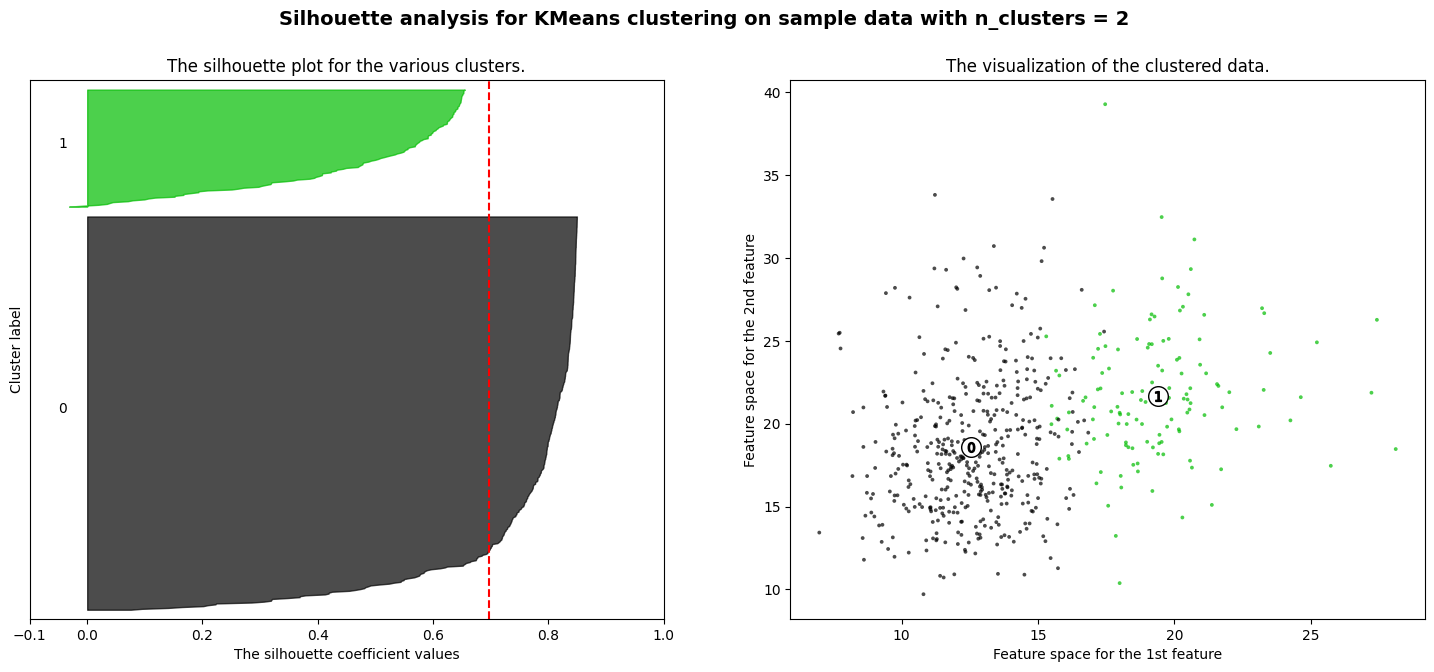

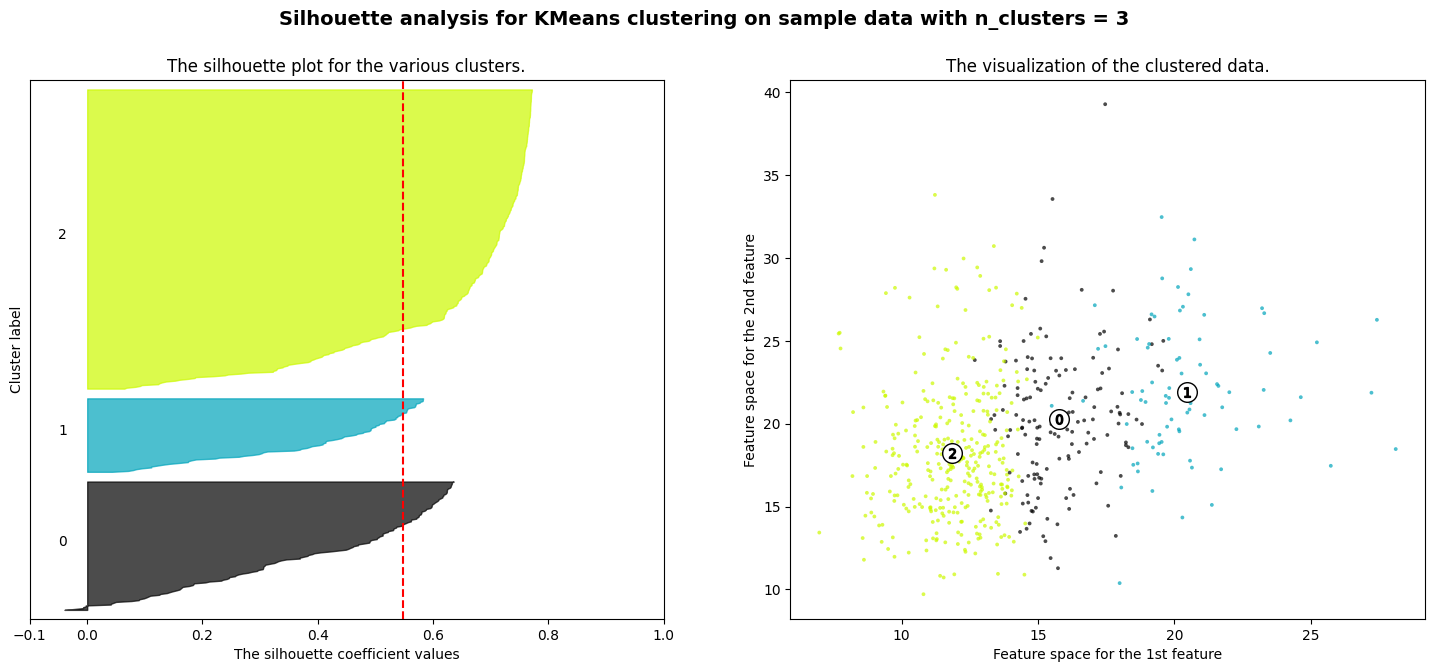

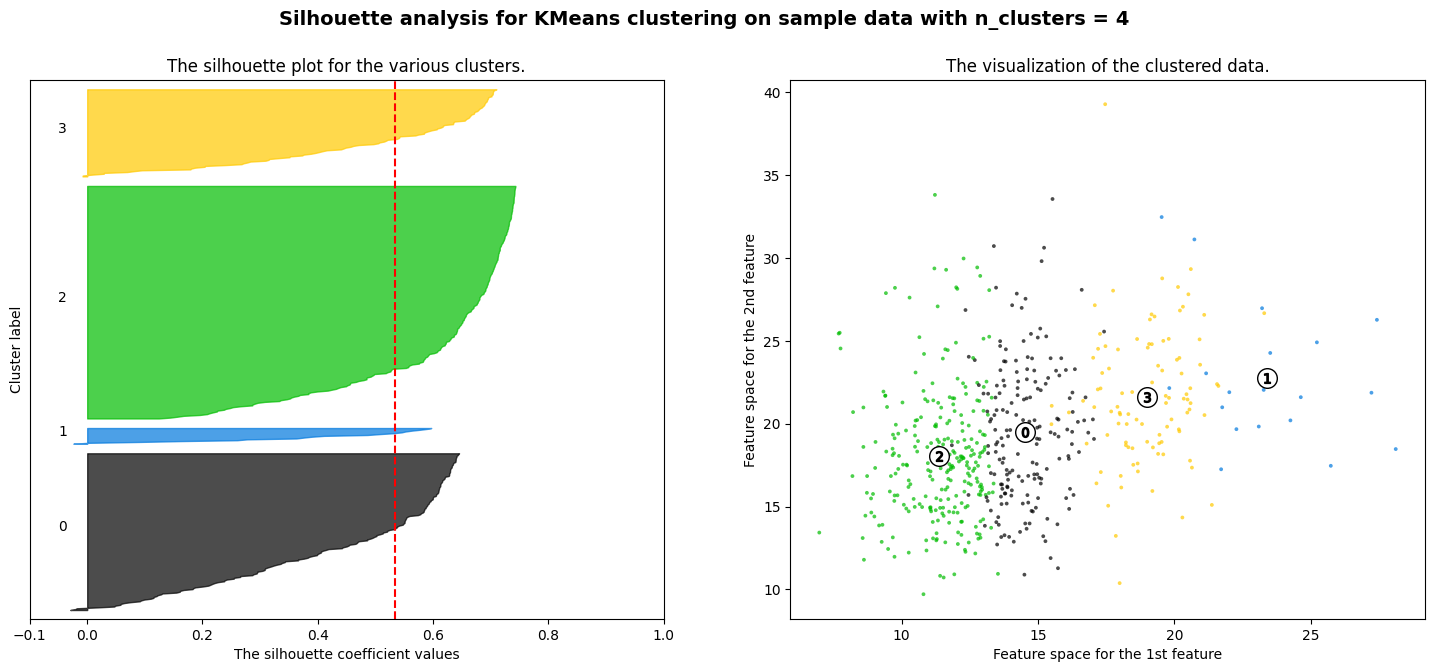

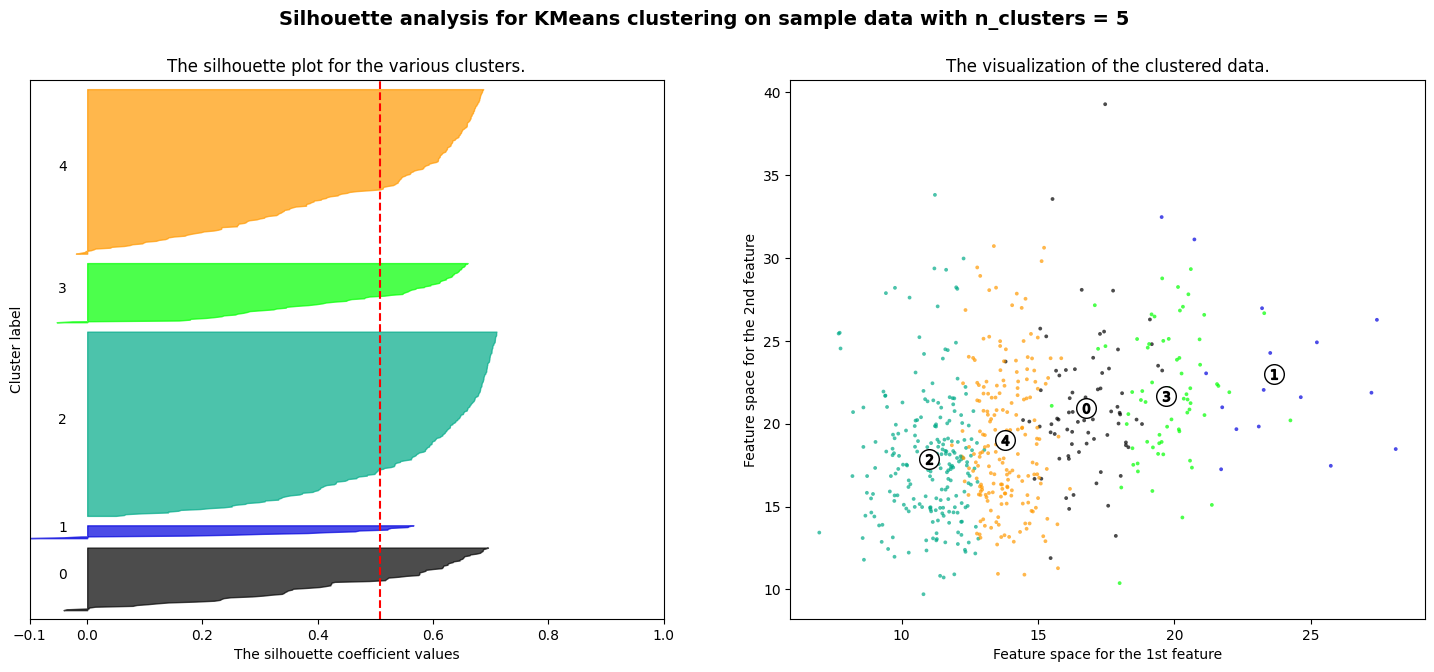

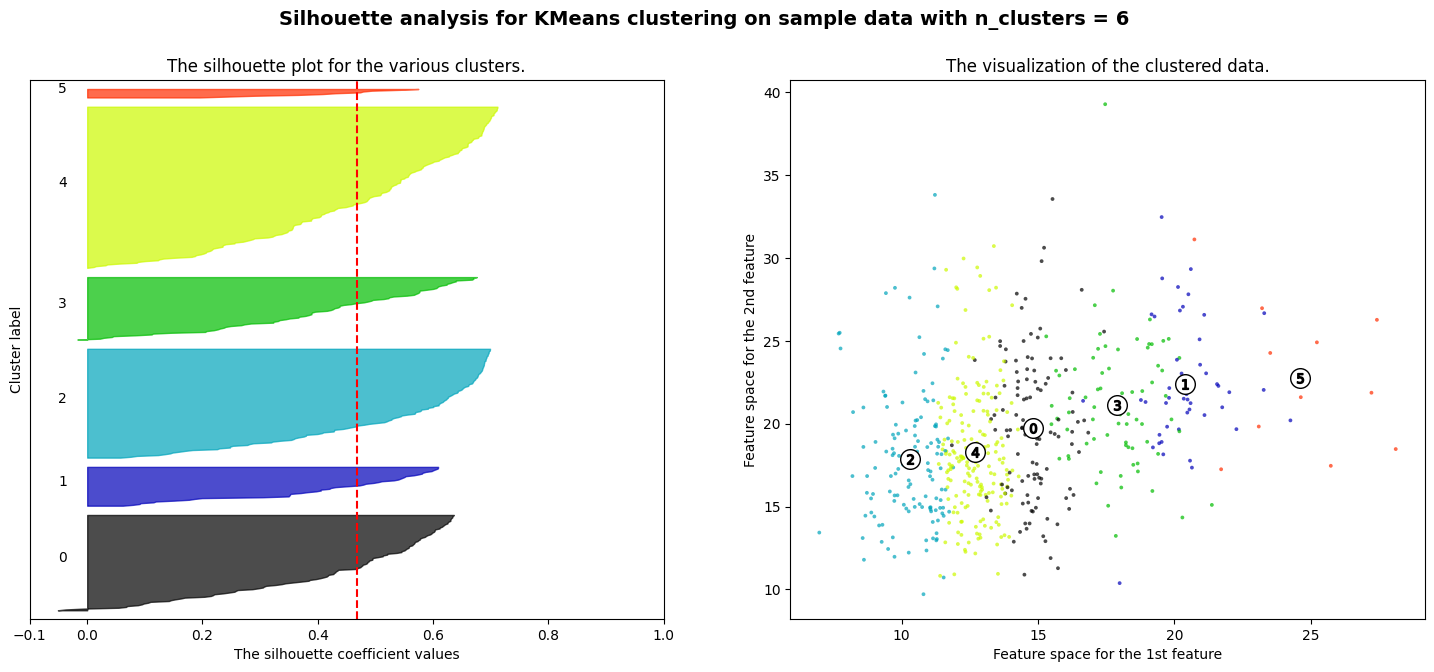

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Assuming X is defined as your dataset

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
    X.iloc[:, 0], X.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


**Plot Insights**

- Cluster Separation: Ideally, you want clusters to be well-separated and distinct. This is indicated by wider and taller (vertically stretched) colored regions in the plot.

- Silhouette Coefficients: Look for clusters where most data points have positive silhouette coefficients (above the dashed line). This indicates that data points are closer to members of their own cluster than to members of neighboring clusters.

- Cluster Size: Check for uneven cluster sizes. Large differences in the width of the colored regions suggest varying densities and potential issues with cluster formation.

## INFERENCE AND CONCLUSION

##### K-Means clustering is an unsupervised learning algorithm to divide data into clusters bsed on similarity and dissimilarity.
##### Ideal clusters have minimum wcss and maximum bcss. 
##### Elbow method is used to assess the within cluster sum of squares. It helps identify the optimum cluster based on wcss alone.
##### Silhoutte scores gives the cluster score based on both wcss and bcss. Hence this is a better method to observe the quality of clusters formed.
##### The PCA techniques is used to reduce the high dimensional data into a 2-d dataframe.
##### The visualizations of the KMeans clusters have been performed, along with plotting of the cluster centres
